# Setup Environment

In [1]:
from working_dir import set_working_dir

In [2]:
set_working_dir()

Current working directory: /Users/jiaxi/Documents/GitHub/CS410-Project


In [3]:
%load_ext autoreload
%autoreload 2

# Import Libraries

In [4]:
import pandas as pd
import dtale
import glob
from cbfile import CBFile
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
pd.set_option('max_colwidth', 400)

# Data Exploration
1) Download Facebook Children Story Project [Training Data](http://www.thespermwhale.com/jaseweston/babi/CBTest.tgz), extract to data foler.


In [7]:
cbtest_dir = "data/CBTest/data"
files = glob.glob(f"{cbtest_dir}/*")
df = pd.DataFrame(files)
df

,0
0,data/CBTest/data/cbtest_V_train.txt
1,data/CBTest/data/cbt_test.txt
2,data/CBTest/data/cbtest_P_train.txt
3,data/CBTest/data/cbtest_NE_valid_2000ex.txt
4,data/CBTest/data/cbtest_NE_train_test.txt
5,data/CBTest/data/cbtest_P_valid_2000ex.txt
6,data/CBTest/data/cbt_train.txt
7,data/CBTest/data/cbtest_CN_train.txt
8,data/CBTest/data/cbt_valid.txt
9,data/CBTest/data/cbtest_CN_test_2500ex.txt


2) The training data is used by Facebook to train algorithms to understand children’s stories and predict the word that was missing from a given sentence in a story. We have reviewed the NE (named entity) file, the CN (common noun) file, the V (verb) file and the P (preposition) file, and they all contained similar structure where there are multiple sets of 21 sentences, with the first 20 used for training and the 21 used as the prediction query. We will remove the 21st sentence in the next "Data Cleansing" section for the purpose of our project. We noticed the NE file contains less conversation specific and duplicate sentences compared to the other files, so we've chosen the NE train file for our project.

In [8]:
file_path = f"{cbtest_dir}/cbtest_NE_train.txt"
file = CBFile(file_path = file_path)
df = file.to_pandas()
len(df)

2283099

3. We noiticed there are duplicate sentences in the data, so we have removed duplicates.

In [9]:
df = df.drop_duplicates(subset=["sentence"])
len(df)

352943

4) We also noticed quite a few sentences are conversation based and there are some short question and response sentence, so we have explored the word count by sentence below.

In [10]:
df.head(21)

,number,sentence
0,1,Some were abroad ; several were ill ; a few were in prison among the Saracens ; others were captives in the dens of ogres .
1,2,"The end of it was that the king and queen had to sit down alone , one at each end of a very long table , arrayed with plates and glasses for a hundred guests -- for a hundred guests who never came !"
2,3,"`` Any soup , my dear ? ''"
3,4,"shouted the king , through a speaking-trumpet ; when , suddenly , the air was filled with a sound like the rustling of the wings of birds ."
4,5,"Flitter , flitter , flutter , went the noise ; and when the queen looked up , lo and behold !"
5,6,"on every seat was a lovely fairy , dressed in green , each with a most interesting-looking parcel in her hand ."
6,7,Do n't you like opening parcels ?
7,8,"The king did , and he was most friendly and polite to the fairies ."
8,9,"But the queen , though she saw them distinctly , took no notice of them ."
9,10,"You see , she did not believe in fairies , nor in her own eyes , when she saw them ."


In [11]:
def count_word(sentence: str):
    words = sentence.split()
    return len(words)

df["word_count"] = df["sentence"].apply(count_word)

In [12]:
dtale.show(df)

<AxesSubplot:xlabel='word_count', ylabel='Count'>

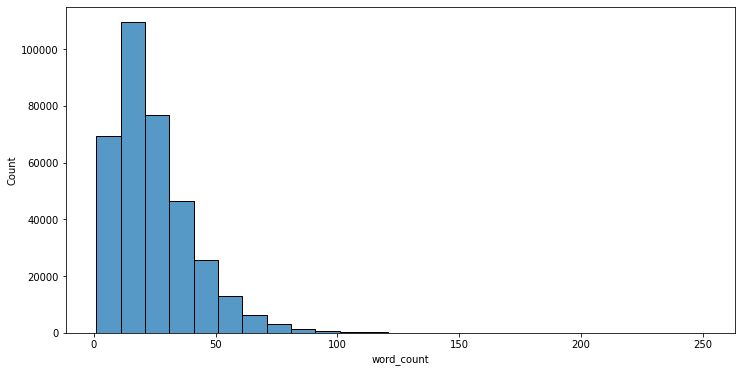

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="word_count", binwidth=10, stat = "count")

<AxesSubplot:xlabel='word_count', ylabel='Percent'>

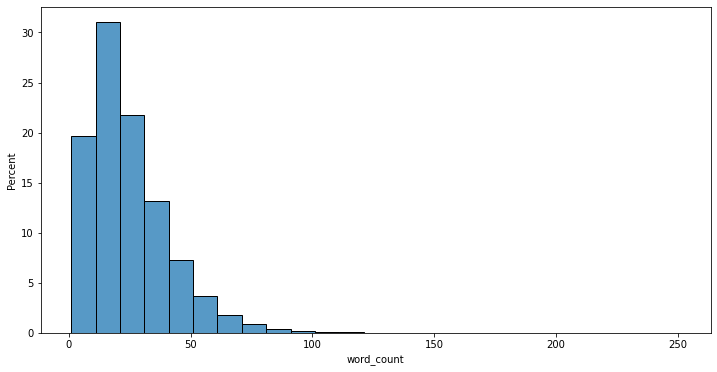

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="word_count", binwidth=10, stat = "percent")

5) Based on the word count histogram, the 10-30 word count is the most common, which accounts for >50% of the data set. We reviewed the sentences with word count less than 10 and decided to remove it for the purpose of our project because these sentences are not good examples to help children learn about the specific word given it's too context specific. 

In [15]:
df[df["word_count"]<10]

,number,sentence,word_count
2,3,"`` Any soup , my dear ? ''",8
6,7,Do n't you like opening parcels ?,7
17,18,CHAPTER II .,3
19,20,"Well , the little prince grew up .",8
32,12,"Well , that was his name .",7
...,...,...,...
2282524,14,He received no reply .,5
2282526,16,Still there was no answer .,6
2282593,20,It was soon fearfully accounted for .,7
2283069,13,POSTSCRIPT .,2


6) We also reviewed the sentences with word count greater than 30 and decided to remove it for the purpose of our project because these sentences are too long for children to learn about the specific word.

In [16]:
df[df["word_count"]>30]

,number,sentence,word_count
1,2,"The end of it was that the king and queen had to sit down alone , one at each end of a very long table , arrayed with plates and glasses for a hundred guests -- for a hundred guests who never came !",44
10,11,"So she talked across the fairies to the king , just as if they had not been there ; but the king behaved as politely as if they were real -- which , of course , they were .",39
12,13,"One offered a purse which could never be empty ; and one a pair of seven-leagued boots ; and another a cap of darkness , that nobody might see the prince when he put it on ; and another a wishing-cap ; and another a carpet , on which , when he sat , he was carried wherever he wished to find himself .",64
13,14,"Another made him beautiful for ever ; and another , brave ; and another , lucky : but the last fairy of all , a cross old thing , crept up and said , `` My child , you shall be too clever ! ''",45
15,16,"But she took no notice at all ; and the fairies went each to her own country , and none of them stayed there at the palace , where nobody believed in them , except the king , a little .",41
...,...,...,...
2283076,20,"When the mirth of the rest of the company had subsided , and silence was restored , he leaned one arm on the elbow of his chair , and sticking the other akimbo , demanded , with a slight , but exceedingly sage motion of the head , and contraction of the brow , what was the moral of the story , and what it went to prove ?",69
2283077,21,"The story-teller , who was just putting a glass of wine to his lips , as a refreshment after his toils , paused for a moment , looked at his inquirer with an air of infinite deference , and , lowering the glass slowly to the table , observed that the story was intended most logically to prove -- `` That there is no situation in life but has its advantages and pleasures -- provided we will but ...",109
2283094,17,"The story-teller , who was just putting a glass of wine to his lips , as a refreshment after his toils , paused for a moment , looked at his inquirer with an air of infinite deference , and , lowering the glass slowly to the table , observed that the story was intended most logically to prove -- `` That there is no situation in life but has its advantages and pleasures -- provided we will but ...",107
2283096,19,"The cautious old gentleman knit his brows tenfold closer after this explanation , being sorely puzzled by the ratiocination of the syllogism , while , methought , the one in pepper-and-salt eyed him with something of a triumphant leer .",40


7) In summary, we will use the sentences with word count between 10 and 30 for our project.

In [17]:
df[(df["word_count"]>=20) & (df["word_count"]<30)]

,number,sentence,word_count
0,1,Some were abroad ; several were ill ; a few were in prison among the Saracens ; others were captives in the dens of ogres .,26
3,4,"shouted the king , through a speaking-trumpet ; when , suddenly , the air was filled with a sound like the rustling of the wings of birds .",28
4,5,"Flitter , flitter , flutter , went the noise ; and when the queen looked up , lo and behold !",21
5,6,"on every seat was a lovely fairy , dressed in green , each with a most interesting-looking parcel in her hand .",22
9,10,"You see , she did not believe in fairies , nor in her own eyes , when she saw them .",21
...,...,...,...
2282909,21,"Hans Van XXXXX as executor of his estate , examined the bundle which contained all his worldly effects .\tRipper\t\tBones|Ripper|brimstone|cranium|crash|dinner-hour|fire|goblin|pommel|stirrups",21
2282950,20,"Knots of gazers and gossips were collected in the churchyard , at the bridge , and at the spot where the hat and pumpkin had been found .",28
2283075,19,"He was one of your wary men , who never laugh but upon good grounds -- when they have reason and law on their side .",26
2283095,18,"`` Ergo , for a country schoolmaster to be refused the hand of a Dutch heiress is a certain step to high preferment in the state . ''",28


# Data Cleansing
Cleanse sentence data for index and ranking later.

Based on the above data exploration, we will:
1) Remove the 21st sentence.
2) Filter for setence with word count between 10-30.
3) Remove sentences with jpg files.

In [18]:
df = df[df["number"]!=21]
len(df)

244340

In [19]:
df = df[(df["word_count"]>=10) & (df["word_count"]<=30)]
len(df)

140612

In [20]:
df = df[~df["sentence"].str.contains('.jpg')]
len(df)

140583

In [21]:
#df = df.reset_index(drop=True)

# Export Cleansed File

In [22]:
df.to_csv('data/cbtest_NE_train_cleaned.csv', index=False) 

In [26]:
df["sentence"].to_csv('idx_data/idx_data.dat', index=False, header=False) 